<h2> Workshop 2: Predicting loan case using Decision Tree </h2>

Name: Jaime Pantoja

Student #: 2436040

Date: June 11, 2024

In [2]:
# Get the data from datahack (https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#ProblemStatement)

# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# Load the dataset from the csv in the folder

dataset = pd.read_csv('train_ctrUa4K.csv')

# Check the first five instances of the dataset
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.shape

(614, 13)

In [5]:
# Student number 2436040 so the random state is define as 40

dataset = dataset.sample(n=550, random_state=40)

# Save the dataset

dataset.to_csv('JaimePantoja_2436040.csv')


In [6]:
# Load the new dataset representing the 550 observations
 
data = pd.read_csv('JaimePantoja_2436040.csv')
data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,439,LP002407,Female,Yes,0,Not Graduate,Yes,7142,0.0,138.0,360.0,1.0,Rural,Y
1,348,LP002137,Male,Yes,0,Graduate,No,6333,4583.0,259.0,360.0,NaN,Semiurban,Y
2,459,LP002473,Male,Yes,0,Graduate,No,8334,0.0,160.0,360.0,1.0,Semiurban,N
3,71,LP001245,Male,Yes,2,Not Graduate,Yes,1875,1875.0,97.0,360.0,1.0,Semiurban,Y
4,51,LP001157,Female,No,0,Graduate,No,3086,0.0,120.0,360.0,1.0,Semiurban,Y


In [7]:
# Drop Unnamed Column

data = data.drop('Unnamed: 0', axis=1)

<h4 style="color:blue;">Q1: Use and explain the following DataFrame functions/properties on your data</h4>

* describe()

In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,550.000000,550.000000,529.000000,538.000000,504.000000
mean,5514.498182,1596.058036,148.353497,341.866171,0.857143
std,6239.403529,2937.434703,88.401448,65.465961,0.350275
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2896.250000,0.000000,100.000000,360.000000,1.000000
50%,3866.000000,1084.500000,128.000000,360.000000,1.000000
75%,5844.000000,2252.250000,170.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


> describe() function gives a quick statistic summary of the numeric variables in the DataFrame. It provides an overview of the mean, distribution, standard deviation, min, and max

* size

In [9]:
data.size

7150

> The size property provides the number of elements in the DataFrame. It is calculated by multiplying the rows and columns

* ndim

In [10]:
data.ndim

2

> The ndim propery defines the number of dimensions the DataFrame has

* shape

In [11]:
data.shape

(550, 13)

> The shape property provides information about the dimensions of the data. In this case the DataFrame has 550 rows and 14 columns

<h4 style="color:blue;">Q2: Is there any difference between the dimensions of the original dataset and the new dataset? If yes, what is the difference?</h4>

> Yes, there is a difference in the number of rows. After sampling one part of the original dataset, the current one has only 550. Regarding the columns (attributes) they are still the same on both (13). In other words, the shape changed from (614, 13) to (550, 13) 

<h4 style="color:blue;">Q3: What are the possible values 'Education' can take? Write code to display all the possible values of 'Education'</h4>

> The possible values in the attribute of education are:

In [12]:
values_education = pd.unique(data['Education'])
print(values_education)


['Not Graduate' 'Graduate']


<h2> Data Analysis</h2>

In [13]:
columns= data.columns
columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002407,Female,Yes,0,Not Graduate,Yes,7142,0.0,138.0,360.0,1.0,Rural,Y
1,LP002137,Male,Yes,0,Graduate,No,6333,4583.0,259.0,360.0,NaN,Semiurban,Y
2,LP002473,Male,Yes,0,Graduate,No,8334,0.0,160.0,360.0,1.0,Semiurban,N
3,LP001245,Male,Yes,2,Not Graduate,Yes,1875,1875.0,97.0,360.0,1.0,Semiurban,Y
4,LP001157,Female,No,0,Graduate,No,3086,0.0,120.0,360.0,1.0,Semiurban,Y


<AxesSubplot: >

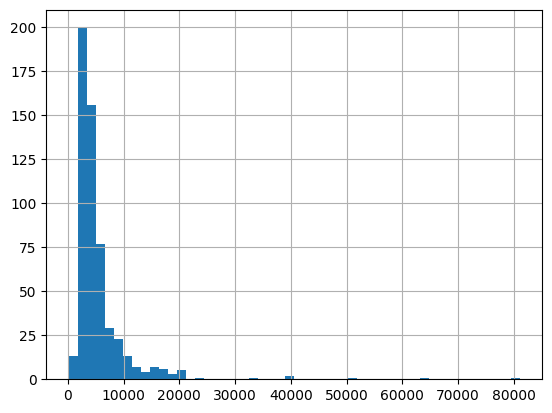

In [15]:
# Let's look 'ApplicantIncome' and 'LoanAmoutn'

data['ApplicantIncome'].hist(bins=50)

<h4 style="color:blue;">Q4: Use boxplot and histogram to 'ApplicantIncome' to visualise its distribution</h4>

Boxplotand histogram are used on the same feature to visualise the data distribution. Compare both ploths and report

<h4 style="color:blue;">4.a What are the extreme values? Are there any outliers(s) exist in this dataset? Explain with example based on the 'ApplicantIncome'</h4>

C:\Users\jaime\AppData\Local\Temp\ipykernel_21644\4050265386.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  hist.set_xticklabels(hist.get_xticks(), rotation=45)
C:\Users\jaime\AppData\Local\Temp\ipykernel_21644\4050265386.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  box.set_xticklabels(box.get_xticks(), rotation=45)


Text(0.5, 0, 'Income')

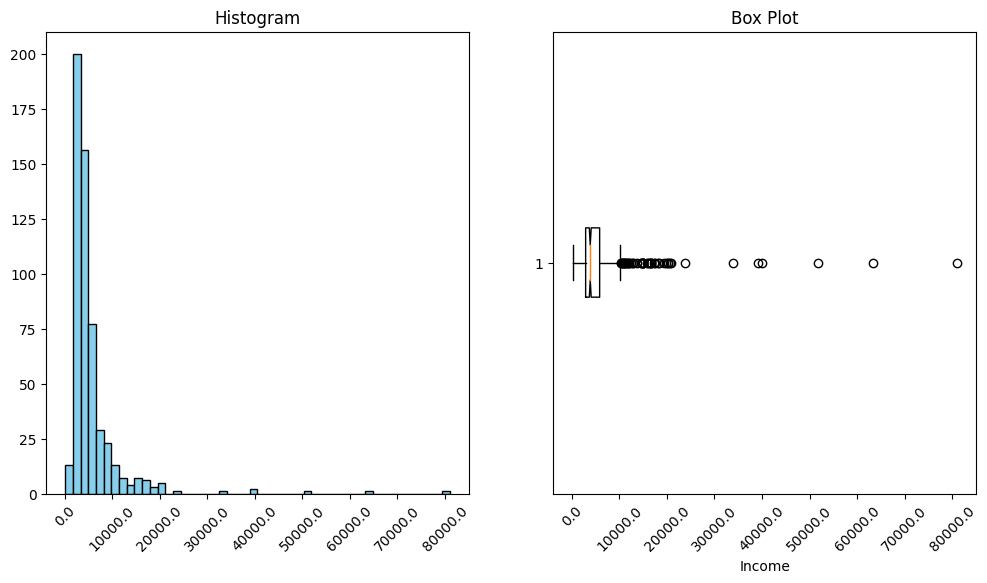

In [16]:
# Figure with two subplots (1 row, 2 columns)
fig, (hist, box) = plt.subplots(1, 2, figsize=(12, 6))

# Add a histogram to the left subplot
hist.hist(data['ApplicantIncome'], bins=50, color='skyblue', edgecolor='black')
hist.set_title('Histogram')
hist.set_xticklabels(hist.get_xticks(), rotation=45)


# Add a box plot to the right subplot
box.boxplot(data['ApplicantIncome'], vert=False, notch=True)
box.set_title('Box Plot')
box.set_xticklabels(box.get_xticks(), rotation=45)

# Set common x-axis label
plt.xlabel('Income')



In [17]:
max_income = data['ApplicantIncome'].max()
print(max_income)

81000


> The extreme values, also known as outliers, can be visualized clearly with the box plot, where all the dots above the upper tail (whisker) of the graph fall into this category.

> In this example taking the 'ApplicantIncome' variable as a reference, the outliers are presented above the 10000 income mark approximately.

<h4 style="color:blue;">4.b Are the results of both the plots comparable? Are there any differences in the two plots? What are the key differences?</h4>

> The results of both plots are comparable because both provide an overview of the distribution for the 'ApplicantIncome' attribute. However, they have some differences regarding the information they provide.

> The histogram helps to identify the shape, center, spread, and skewness of the data's distribution. On the other hand, the box plot provides a concise statistical summary for identifying metrics such as the median, quartile ranges, and outliers.

<h4 style="color:blue;">Try-It-Yourself:</h4> Use Histogram and Box plot on 'LoanAmount' and observe extreme values.

In [18]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002407,Female,Yes,0,Not Graduate,Yes,7142,0.0,138.0,360.0,1.0,Rural,Y
1,LP002137,Male,Yes,0,Graduate,No,6333,4583.0,259.0,360.0,NaN,Semiurban,Y
2,LP002473,Male,Yes,0,Graduate,No,8334,0.0,160.0,360.0,1.0,Semiurban,N
3,LP001245,Male,Yes,2,Not Graduate,Yes,1875,1875.0,97.0,360.0,1.0,Semiurban,Y
4,LP001157,Female,No,0,Graduate,No,3086,0.0,120.0,360.0,1.0,Semiurban,Y


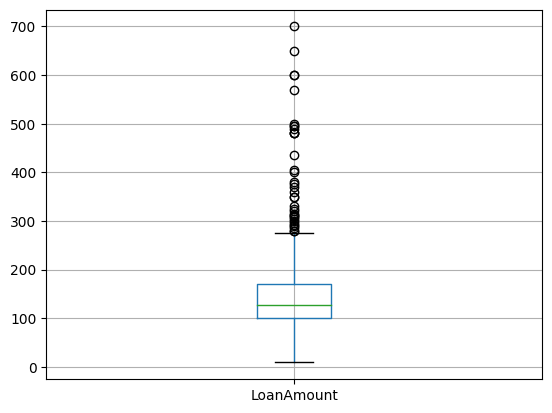

In [19]:
# Box plot
data.boxplot(column='LoanAmount')
plt.show()


<AxesSubplot: >

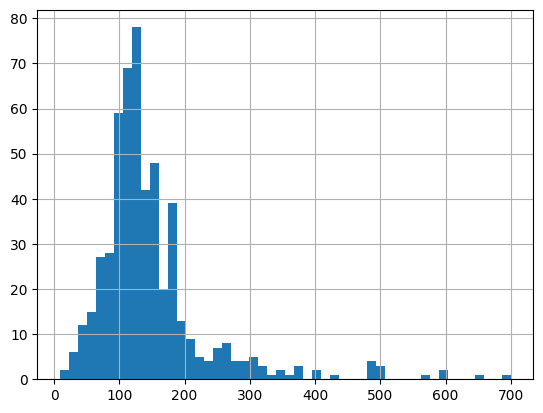

In [20]:
# Histogram

data['LoanAmount'].hist(bins=50)

<h3> Categorical variable analysis</h3>
In this section we will create a pivot table from dataframe, which is similar to the pivot table in excel. A Pivot Table is an effective way of analysing and summarising data using aggregate functions such as sum, mean and count. You can then compare, see patterns and trends in the data.

If you are not sure what is pivote table. Please see pivote table (https://en.wikipedia.org/wiki/Pivot_table) and simple working example (http://www.datasciencemadesimple.com/create-pivot-table-pandas-python/) of pivote table.


In [21]:
data['Credit_History'].value_counts()

1.0    432
0.0     72
Name: Credit_History, dtype: int64

In [22]:
credit_history = data['Credit_History'].value_counts(ascending=True)
loan_probability = data.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc= lambda x:x.map({'Y':1, 'N':0}).mean())

print('Frequency Table for Credit History')
print(credit_history)
print('n\Probability of getting a loan for each Credit History class: ')
print(loan_probability)

Frequency Table for Credit History
0.0     72
1.0    432
Name: Credit_History, dtype: int64
n\Probability of getting a loan for each Credit History class: 
                Loan_Status
Credit_History             
0.0                0.069444
1.0                0.803241


In [23]:
data['Loan_Status'].value_counts()

Y    386
N    164
Name: Loan_Status, dtype: int64

In [24]:
data.shape

(550, 13)

In [25]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002407,Female,Yes,0,Not Graduate,Yes,7142,0.0,138.0,360.0,1.0,Rural,Y
1,LP002137,Male,Yes,0,Graduate,No,6333,4583.0,259.0,360.0,NaN,Semiurban,Y
2,LP002473,Male,Yes,0,Graduate,No,8334,0.0,160.0,360.0,1.0,Semiurban,N
3,LP001245,Male,Yes,2,Not Graduate,Yes,1875,1875.0,97.0,360.0,1.0,Semiurban,Y
4,LP001157,Female,No,0,Graduate,No,3086,0.0,120.0,360.0,1.0,Semiurban,Y


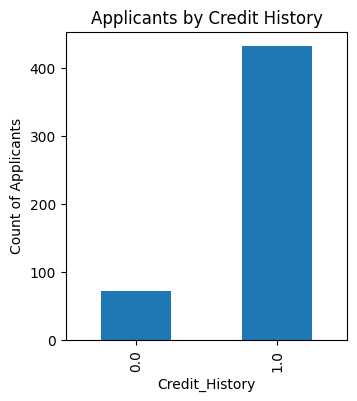

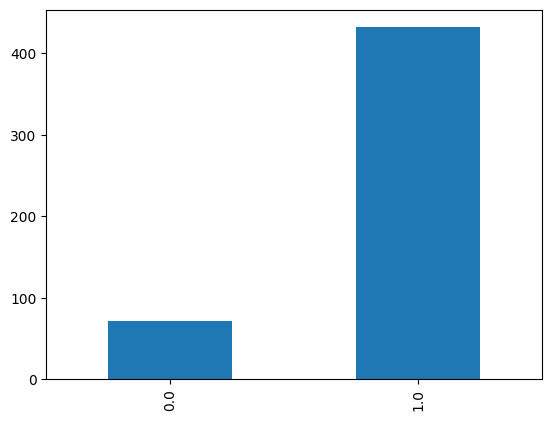

In [26]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit History")
credit_history.plot(kind='bar')
plt.show()

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting a Loan')
ax2.set_title("Probability of getting a loan by credit history")
credit_history.plot(kind='bar')
plt.show()



### Data Pre-processing:

* Missing values
* Outliers and extreme values
* Dealing with non-numerical fields


In [27]:
# The dropna=False will show in the count the elements that have missing values  

data['Gender'].value_counts(dropna=False)

Male      440
Female     98
NaN        12
Name: Gender, dtype: int64

### Filling in missing values by mean

In [28]:
# It calculates the number of missing values in the dataframe by column

data.apply( lambda x: sum(x.isnull()), axis = 0)

Loan_ID               0
Gender               12
Married               3
Dependents           13
Education             0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     12
Credit_History       46
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
# Fill values in Loan Aomunt with the mean of that column

data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)



In [30]:
# Check again the missing values. Now the Loan Amount shows zero

data.apply( lambda x: sum(x.isnull()), axis = 0)

Loan_ID               0
Gender               12
Married               3
Dependents           13
Education             0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     12
Credit_History       46
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
data.shape

(550, 13)

In [32]:
data.to_csv('new_train.csv')

It will be interseting to know how much loan amount could be offered to which sort of people based on their 'Education' and 'Self Employed' statues?

For this, we'll use boxplot and group by multiple variables - 'Education' and 'Self_Employed'.

Note: LoanAmount is a numeric attribute. Whereas, Group by can be applied on numeric and non-numeric attributes

<AxesSubplot: title={'center': 'LoanAmount'}, xlabel='[Education, Self_Employed]'>

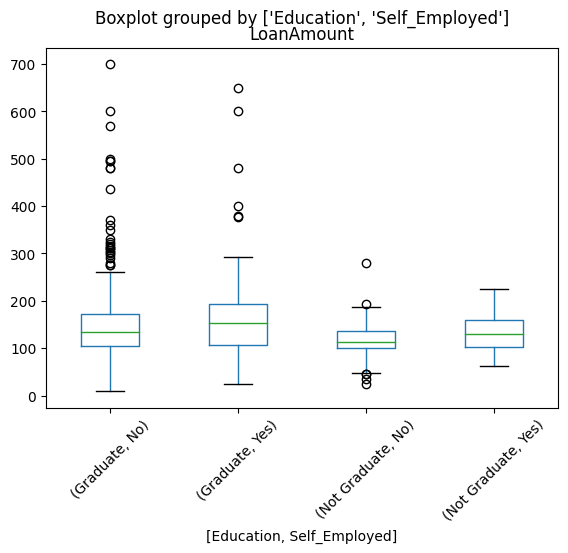

In [33]:
data.boxplot(column='LoanAmount', by=['Education', 'Self_Employed'],
             grid=False, rot=45, fontsize=10)


### Impute the values
The above boxplot gives some good insight of each group receiving the loan amount. Data points that form a different patterns are outliers - in circles. We'll deal with the outliers later, for now let’s observe some of the variations which are visible in the median of loan amount. 

And, we have seen that Self_Employed has 32 missing values. This could be a possible reason of these variations. So let's deal with this by imputing the values.

Before that let's fill in the missing values by some suitable values - not mean this time!



In [34]:
data['Self_Employed'].value_counts(dropna=False)

# Here we can see that 30 values are NaN

No     444
Yes     76
NaN     30
Name: Self_Employed, dtype: int64

In [35]:
# Based on a higher percentage of "No" values (atound 86%), it is a safer option  to impute the missing values as "No" as there is a high probability of success.

data['Self_Employed'].fillna('No', inplace=True)

In [36]:
# Check the missing values by column. Now the Self_Employed is zero

data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               12
Married               3
Dependents           13
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     12
Credit_History       46
Property_Area         0
Loan_Status           0
dtype: int64

### Dealing outliers

Extreme values are the minimum and the maximum values in the dataset. Values beyond extreme values are considered as outliers.

Outliers are the data points those are far away from all other data point and represent unusual patterns in the dataset.

Depending on the problem domain, outliers could be considered as an activity of interest (e.g., a malicious attack in a network) or could be ignoredcompletely (e.g., times of the day when the network traffic are high).

Most of the learning algorithms are sensitive to outliers. Outliers can negatively influence and distort the result. Therefore, it is important to treat them.

Outliers can be treated similar to missing values i.e., by removing or replacing them by appropriate values. It is also possible to take log transformation of outliers to reduce its influence. To better understand this concept, let's visualise ‘LoanAmount’ before and after treating outliers of ‘LoanAmount’.


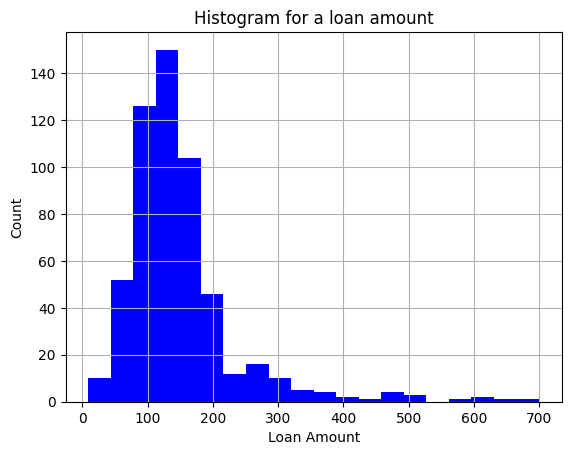

In [37]:
plt.hist(data['LoanAmount'], 20, facecolor='b')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Histogram for a loan amount')
plt.grid(True)
plt.show()

<AxesSubplot: >

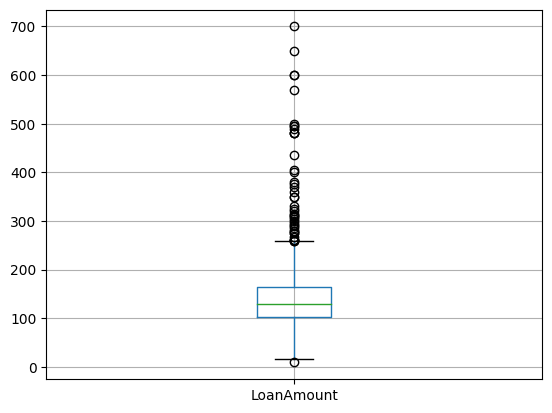

In [38]:
data.boxplot(column='LoanAmount')

In [39]:
# Here we use the natural logarithm to make the data distribution more symmetrical

data['LoanAmount_log'] = np.log(data['LoanAmount'])

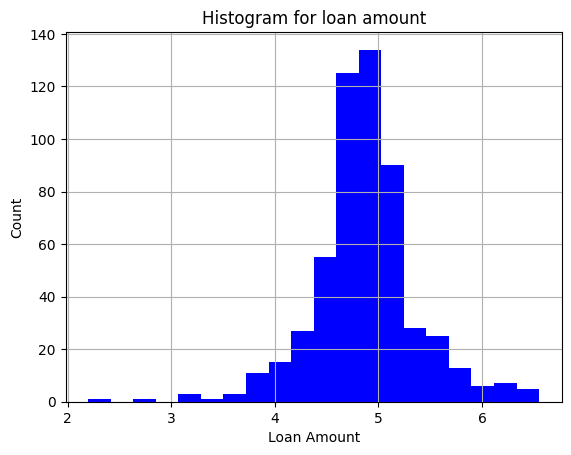

In [40]:
plt.hist(data['LoanAmount_log'], 20, facecolor ='b')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Histogram for loan amount')
plt.grid(True)
plt.show()

<AxesSubplot: >

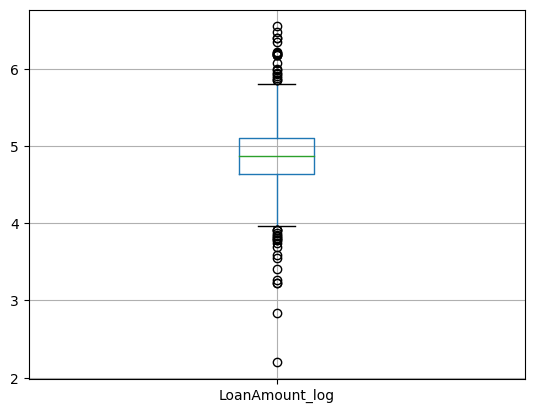

In [41]:
data.boxplot(column='LoanAmount_log')

In [42]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP002407,Female,Yes,0,Not Graduate,Yes,7142,0.0,138.0,360.0,1.0,Rural,Y,4.927254
1,LP002137,Male,Yes,0,Graduate,No,6333,4583.0,259.0,360.0,NaN,Semiurban,Y,5.556828
2,LP002473,Male,Yes,0,Graduate,No,8334,0.0,160.0,360.0,1.0,Semiurban,N,5.075174
3,LP001245,Male,Yes,2,Not Graduate,Yes,1875,1875.0,97.0,360.0,1.0,Semiurban,Y,4.574711
4,LP001157,Female,No,0,Graduate,No,3086,0.0,120.0,360.0,1.0,Semiurban,Y,4.787492


In [43]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log
count,550.000000,550.000000,550.000000,538.000000,504.000000,550.000000
mean,5514.498182,1596.058036,148.353497,341.866171,0.857143,4.872129
std,6239.403529,2937.434703,86.694225,65.465961,0.350275,0.501753
min,150.000000,0.000000,9.000000,12.000000,0.000000,2.197225
25%,2896.250000,0.000000,103.000000,360.000000,1.000000,4.634729
50%,3866.000000,1084.500000,130.000000,360.000000,1.000000,4.867534
75%,5844.000000,2252.250000,165.000000,360.000000,1.000000,5.105945
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,6.551080


It is ideal to remove the  'LoanAmount' from the dataset as we have transformed it.

In [44]:
data = data.drop(['LoanAmount'], axis=1)

In [45]:
columns = data.columns

print(columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')


Now the distribution looks much closer to normal

<h4 style="color:blue;"> Try-it yourself:</h4> Perform some other interesting analysis which can be derived from the data. Such as:

* Check another variable for outliers and treat it.

* Generate a new variable by combining two variables e.g., 'ApplicantIncome' and 'CoapplicantIncome

In [46]:
data.describe()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,LoanAmount_log
count,550.000000,550.000000,538.000000,504.000000,550.000000
mean,5514.498182,1596.058036,341.866171,0.857143,4.872129
std,6239.403529,2937.434703,65.465961,0.350275,0.501753
min,150.000000,0.000000,12.000000,0.000000,2.197225
25%,2896.250000,0.000000,360.000000,1.000000,4.634729
50%,3866.000000,1084.500000,360.000000,1.000000,4.867534
75%,5844.000000,2252.250000,360.000000,1.000000,5.105945
max,81000.000000,41667.000000,480.000000,1.000000,6.551080


C:\Users\jaime\AppData\Local\Temp\ipykernel_21644\1663168703.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  hist_Co.set_xticklabels(hist_Co.get_xticks(), rotation=45)
C:\Users\jaime\AppData\Local\Temp\ipykernel_21644\1663168703.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  box_Co.set_xticklabels(box_Co.get_xticks(), rotation=45)


[Text(-10000.0, 0, '-10000.0'),
 Text(0.0, 0, '0.0'),
 Text(10000.0, 0, '10000.0'),
 Text(20000.0, 0, '20000.0'),
 Text(30000.0, 0, '30000.0'),
 Text(40000.0, 0, '40000.0'),
 Text(50000.0, 0, '50000.0')]

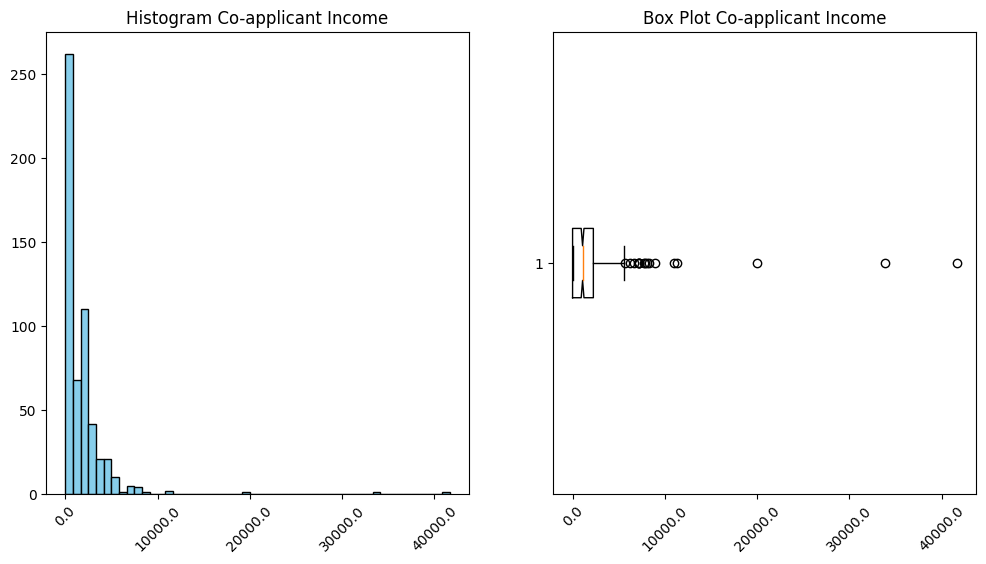

In [47]:
# Identify another variable with outliers 

# Figure with two subplots (1 row, 2 columns)
fig_2, (hist_Co, box_Co) = plt.subplots(1, 2, figsize=(12, 6))

# Add a histogram to the left subplot
hist_Co.hist(data['CoapplicantIncome'], bins=50, color='skyblue', edgecolor='black')
hist_Co.set_title('Histogram Co-applicant Income')
hist_Co.set_xticklabels(hist_Co.get_xticks(), rotation=45)

# Add a box plot to the right subplot
box_Co.boxplot(data['CoapplicantIncome'], vert=False, notch=True)
box_Co.set_title('Box Plot Co-applicant Income')
box_Co.set_xticklabels(box_Co.get_xticks(), rotation=45)


In [48]:
# Check if the column has negative, zero or Nan values before using the natural log, otherwise the formula will result in error

# Count NaN values
nan_count = data['CoapplicantIncome'].isna().sum()

# Count negative and zero values
negative_zero_count = (data['CoapplicantIncome'] <= 0).sum()

# Total count of NaN or negative values
total_count = nan_count + negative_zero_count

print("Total count of NaN, negative or zero values:", total_count)

Total count of NaN, negative or zero values: 246


In [49]:
# To avoid errors when applying the ln it is important to change from zero to a small number to avoid any error in the calculation
# Duplicate the dataset 

data_2 = data.copy()

data_2['CoapplicantIncome_two'] = data_2['CoapplicantIncome']
data_2['CoapplicantIncome_two'] = data_2['CoapplicantIncome_two'].replace(0, data_2['CoapplicantIncome_two'].mean())


'CoapplicantIncome' is a variable that has multiple outliers. Those will be handled using the same approach as with 'ApplicantIncome'

In [50]:
# Create a new column with the asymetrical data distribution.

data_2['CoapplicantIncome_log'] = np.log(data_2['CoapplicantIncome_two'])
data_2.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,CoapplicantIncome_two,CoapplicantIncome_log
0,LP002407,Female,Yes,0,Not Graduate,Yes,7142,0.0,360.0,1.0,Rural,Y,4.927254,1596.058036,7.375292
1,LP002137,Male,Yes,0,Graduate,No,6333,4583.0,360.0,NaN,Semiurban,Y,5.556828,4583.000000,8.430109
2,LP002473,Male,Yes,0,Graduate,No,8334,0.0,360.0,1.0,Semiurban,N,5.075174,1596.058036,7.375292
3,LP001245,Male,Yes,2,Not Graduate,Yes,1875,1875.0,360.0,1.0,Semiurban,Y,4.574711,1875.000000,7.536364
4,LP001157,Female,No,0,Graduate,No,3086,0.0,360.0,1.0,Semiurban,Y,4.787492,1596.058036,7.375292


C:\Users\jaime\AppData\Local\Temp\ipykernel_21644\2657998407.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  hist_Colog.set_xticklabels(hist_Colog.get_xticks(), rotation=45)
C:\Users\jaime\AppData\Local\Temp\ipykernel_21644\2657998407.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  box_Colog.set_xticklabels(box_Colog.get_xticks(), rotation=45)


[Text(2.0, 0, '2.0'),
 Text(3.0, 0, '3.0'),
 Text(4.0, 0, '4.0'),
 Text(5.0, 0, '5.0'),
 Text(6.0, 0, '6.0'),
 Text(7.0, 0, '7.0'),
 Text(8.0, 0, '8.0'),
 Text(9.0, 0, '9.0'),
 Text(10.0, 0, '10.0'),
 Text(11.0, 0, '11.0'),
 Text(12.0, 0, '12.0')]

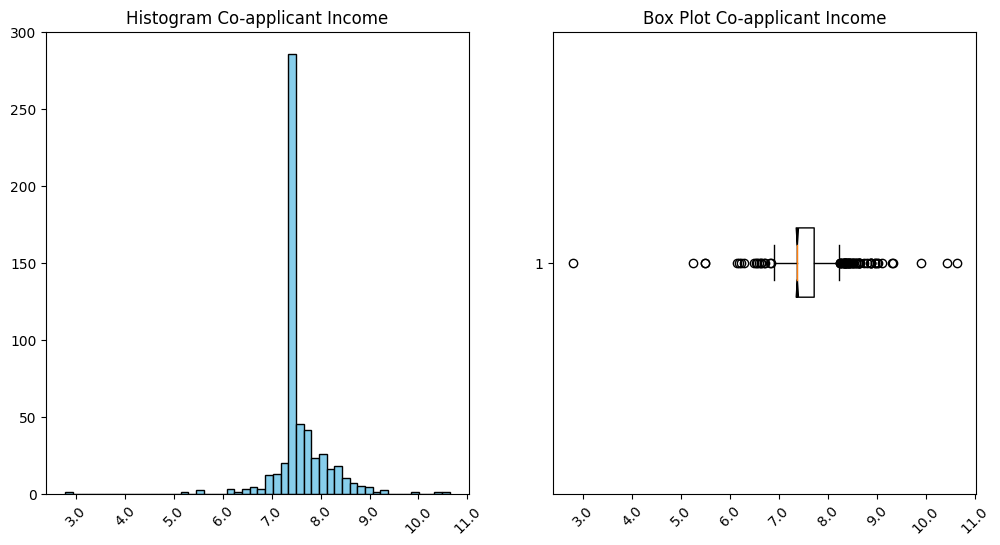

In [51]:


# Figure with two subplots (1 row, 2 columns)
fig_3, (hist_Colog, box_Colog) = plt.subplots(1, 2, figsize=(12, 6))

# Add a histogram to the left subplot
hist_Colog.hist(data_2['CoapplicantIncome_log'], bins=50, color='skyblue', edgecolor='black')
hist_Colog.set_title('Histogram Co-applicant Income')
hist_Colog.set_xticklabels(hist_Colog.get_xticks(), rotation=45)

# Add a box plot to the right subplot
box_Colog.boxplot(data_2['CoapplicantIncome_log'], vert=False, notch=True)
box_Colog.set_title('Box Plot Co-applicant Income')
box_Colog.set_xticklabels(box_Colog.get_xticks(), rotation=45)

In [52]:
# Generate a new variable combining 'ApplicantIncome' and 'CoapplicantIncome'm

data_2['combineIncome'] = data_2['ApplicantIncome'] + data_2['CoapplicantIncome']

data_2.shape

(550, 16)

### Missing values continuous:
There are more missing values present in the data. Before we build the model, we need to perform some more pre-processing and convert all the values as metrics:
* Fill all the missing values
* Convert categorical variables into numeric as sklearn works in numeric values only.

Here we will use mode() to fill in the missing values. Mode is the value which occurs most often

In [53]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               12
Married               3
Dependents           13
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
Loan_Amount_Term     12
Credit_History       46
Property_Area         0
Loan_Status           0
LoanAmount_log        0
dtype: int64

In [54]:
data['Gender'].fillna( data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Married'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

<h4 style="color:blue;">Q5. Use LabelEncoder, to convert categorical variables into numeric. Hint: You will first need to identify categorical values</h4>

> Finding the categorical values can be done by using select_dtypes, this function finds columns with object data, which usually represent categorical variables. However, it is important to understand the variables and classify them accordingly.

In [55]:
categorical_variables = data.select_dtypes(include=['object']).columns
print(categorical_variables)
print(data.shape)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')
(550, 13)


In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
columns = list(data)
print(columns)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status', 'LoanAmount_log']


In [58]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP002407,Female,Yes,0,Not Graduate,Yes,7142,0.0,360.0,1.0,Rural,Y,4.927254
1,LP002137,Male,Yes,0,Graduate,No,6333,4583.0,360.0,1.0,Semiurban,Y,5.556828
2,LP002473,Male,Yes,0,Graduate,No,8334,0.0,360.0,1.0,Semiurban,N,5.075174
3,LP001245,Male,Yes,2,Not Graduate,Yes,1875,1875.0,360.0,1.0,Semiurban,Y,4.574711
4,LP001157,Female,No,0,Graduate,No,3086,0.0,360.0,1.0,Semiurban,Y,4.787492


In [59]:
# columns = list(data.select_dtypes(exclude=['float64','int64']))

In [60]:
c_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [61]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
LoanAmount_log       float64
dtype: object

In [62]:
le = LabelEncoder()
for i in c_columns:
    data[i] = le.fit_transform(data[i])

In [63]:
data.head(25)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP002407,0,1,0,1,1,7142,0.0,360.0,1.0,0,1,4.927254
1,LP002137,1,1,0,0,0,6333,4583.0,360.0,1.0,1,1,5.556828
2,LP002473,1,1,0,0,0,8334,0.0,360.0,1.0,1,0,5.075174
3,LP001245,1,1,2,1,1,1875,1875.0,360.0,1.0,1,1,4.574711
4,LP001157,0,0,0,0,0,3086,0.0,360.0,1.0,1,1,4.787492
5,LP001028,1,1,2,0,0,3073,8106.0,360.0,1.0,2,1,5.298317
6,LP001807,1,1,2,0,1,6250,1300.0,360.0,1.0,0,1,4.682131
7,LP002002,0,0,0,0,0,2917,0.0,360.0,1.0,1,1,4.430817
8,LP001744,1,0,0,0,0,2971,2791.0,360.0,1.0,1,1,4.969813
9,LP002205,1,0,1,0,0,3062,1987.0,180.0,0.0,2,0,4.709530


### Data Normalisation

As can be seen in the above table each column is in different scales. For example 'ApplicantIncome' column is in the range of thousands while'Dependents' column is usually below 10. Having features with different scales can cause problems to the machine learning model. Therefore, we performnormalisation across the columns using normalize function in sklearn. There are other ways to perform normalisation such as using StandardScaler insklearn. You will see them in Week 5.

In [64]:
from sklearn.preprocessing import normalize

In [65]:
original_data = data.copy()
original_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP002407,0,1,0,1,1,7142,0.0,360.0,1.0,0,1,4.927254
1,LP002137,1,1,0,0,0,6333,4583.0,360.0,1.0,1,1,5.556828
2,LP002473,1,1,0,0,0,8334,0.0,360.0,1.0,1,0,5.075174
3,LP001245,1,1,2,1,1,1875,1875.0,360.0,1.0,1,1,4.574711
4,LP001157,0,0,0,0,0,3086,0.0,360.0,1.0,1,1,4.787492


In [66]:
original_data[0:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP002407,0,1,0,1,1,7142,0.0,360.0,1.0,0,1,4.927254
1,LP002137,1,1,0,0,0,6333,4583.0,360.0,1.0,1,1,5.556828
2,LP002473,1,1,0,0,0,8334,0.0,360.0,1.0,1,0,5.075174
3,LP001245,1,1,2,1,1,1875,1875.0,360.0,1.0,1,1,4.574711
4,LP001157,0,0,0,0,0,3086,0.0,360.0,1.0,1,1,4.787492


In [67]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP002407,0,1,0,1,1,7142,0.0,360.0,1.0,0,1,4.927254
1,LP002137,1,1,0,0,0,6333,4583.0,360.0,1.0,1,1,5.556828
2,LP002473,1,1,0,0,0,8334,0.0,360.0,1.0,1,0,5.075174
3,LP001245,1,1,2,1,1,1875,1875.0,360.0,1.0,1,1,4.574711
4,LP001157,0,0,0,0,0,3086,0.0,360.0,1.0,1,1,4.787492


In [68]:
data[0:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP002407,0,1,0,1,1,7142,0.0,360.0,1.0,0,1,4.927254
1,LP002137,1,1,0,0,0,6333,4583.0,360.0,1.0,1,1,5.556828
2,LP002473,1,1,0,0,0,8334,0.0,360.0,1.0,1,0,5.075174
3,LP001245,1,1,2,1,1,1875,1875.0,360.0,1.0,1,1,4.574711
4,LP001157,0,0,0,0,0,3086,0.0,360.0,1.0,1,1,4.787492


In [69]:
data_for_norm = data.drop(['Loan_ID', 'Loan_Status'], axis=1)

We exclude 'Loan_Status' from normalisation. 'Loan_Status' is binary class.

In [70]:
normalized_data = normalize(data_for_norm)

In [71]:
print(normalized_data[0:5])

[[0.00000000e+00 1.39839226e-04 0.00000000e+00 1.39839226e-04
  1.39839226e-04 9.98731755e-01 0.00000000e+00 5.03421215e-02
  1.39839226e-04 0.00000000e+00 6.89023343e-04]
 [1.27785314e-04 1.27785314e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 8.09264395e-01 5.85640095e-01 4.60027131e-02
  1.27785314e-04 1.27785314e-04 7.10081020e-04]
 [1.19878584e-04 1.19878584e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 9.99068119e-01 0.00000000e+00 4.31562902e-02
  1.19878584e-04 1.19878584e-04 6.08404651e-04]
 [3.73694558e-04 3.73694558e-04 7.47389117e-04 3.73694558e-04
  3.73694558e-04 7.00677297e-01 7.00677297e-01 1.34530041e-01
  3.73694558e-04 3.73694558e-04 1.70954460e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 9.93263092e-01 0.00000000e+00 1.15869965e-01
  3.21861015e-04 3.21861015e-04 1.54090695e-03]]


Resultant normalized data (normalized_data) is in the form of ndimenssional array. Fit it back to a dataframe to perform further processing with Pandas.

In [72]:
normalized_data.shape

(550, 11)

In [73]:
data.shape

(550, 13)

In [74]:
normalized_data = pd.DataFrame(normalized_data, columns=data_for_norm.columns)

In [75]:
normalized_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,0.000000,0.000140,0.000000,0.000140,0.000140,0.998732,0.000000,0.050342,0.000140,0.000000,0.000689
1,0.000128,0.000128,0.000000,0.000000,0.000000,0.809264,0.585640,0.046003,0.000128,0.000128,0.000710
2,0.000120,0.000120,0.000000,0.000000,0.000000,0.999068,0.000000,0.043156,0.000120,0.000120,0.000608
3,0.000374,0.000374,0.000747,0.000374,0.000374,0.700677,0.700677,0.134530,0.000374,0.000374,0.001710
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.993263,0.000000,0.115870,0.000322,0.000322,0.001541
5,0.000115,0.000115,0.000231,0.000000,0.000000,0.354178,0.934257,0.041492,0.000115,0.000231,0.000611
6,0.000156,0.000156,0.000313,0.000000,0.000156,0.977492,0.203318,0.056304,0.000156,0.000000,0.000732
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.992469,0.000000,0.122485,0.000340,0.000340,0.001508
8,0.000244,0.000000,0.000000,0.000000,0.000000,0.726014,0.682028,0.087972,0.000244,0.000244,0.001214
9,0.000274,0.000000,0.000274,0.000000,0.000000,0.837838,0.543691,0.049252,0.000000,0.000547,0.001289


In [76]:
normalized_data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,0.000180,0.000144,0.000170,0.000057,0.000024,0.881034,0.299692,0.077654,0.000196,0.000238,0.001068
std,0.000124,0.000131,0.000260,0.000118,0.000070,0.168607,0.313382,0.039108,0.000121,0.000233,0.000428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.009983,0.000000,0.002207,0.000000,0.000000,0.000073
25%,0.000090,0.000000,0.000000,0.000000,0.000000,0.805164,0.000000,0.048401,0.000113,0.000000,0.000784
50%,0.000186,0.000145,0.000000,0.000000,0.000000,0.970635,0.223337,0.075998,0.000204,0.000210,0.001067
75%,0.000266,0.000248,0.000289,0.000000,0.000000,0.997364,0.588019,0.102802,0.000280,0.000362,0.001345
max,0.000673,0.000589,0.001401,0.000673,0.000455,0.999996,0.999941,0.242218,0.000673,0.001346,0.002663


In [77]:
normalized_data['Loan_Status'] = data['Loan_Status']

In [78]:
normalized_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Loan_Status
0,0.000000,0.000140,0.000000,0.000140,0.000140,0.998732,0.000000,0.050342,0.000140,0.000000,0.000689,1
1,0.000128,0.000128,0.000000,0.000000,0.000000,0.809264,0.585640,0.046003,0.000128,0.000128,0.000710,1
2,0.000120,0.000120,0.000000,0.000000,0.000000,0.999068,0.000000,0.043156,0.000120,0.000120,0.000608,0
3,0.000374,0.000374,0.000747,0.000374,0.000374,0.700677,0.700677,0.134530,0.000374,0.000374,0.001710,1
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.993263,0.000000,0.115870,0.000322,0.000322,0.001541,1
5,0.000115,0.000115,0.000231,0.000000,0.000000,0.354178,0.934257,0.041492,0.000115,0.000231,0.000611,1
6,0.000156,0.000156,0.000313,0.000000,0.000156,0.977492,0.203318,0.056304,0.000156,0.000000,0.000732,1
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.992469,0.000000,0.122485,0.000340,0.000340,0.001508,1
8,0.000244,0.000000,0.000000,0.000000,0.000000,0.726014,0.682028,0.087972,0.000244,0.000244,0.001214,1
9,0.000274,0.000000,0.000274,0.000000,0.000000,0.837838,0.543691,0.049252,0.000000,0.000547,0.001289,0


## Building a Decision Tree classifier using sklearn

Import all necessary libraries for sklearn

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import export_graphviz
import pydotplus


### Feature selection:

For a small dataset, using all the features to build the feature space or a model may not be an exhaustive and expensive process. However, for a large dataset, it is not an ideal way to utilise all the features as it will result in a high dimensional feature space, and will be an exhaustive search, expensive and time-consuming job.

Feature selection is an important step of pre-processing, where we tend to remove the features that do not or less likely to contribute to the classification results. We aim to remove such features without compromising on the classification results.

There could be different ways to perform feature selection. One way is *intuitive*, where knowing the business problem and domain knowledge, we simply use our judgement for selecting most discriminating features. There are other automatic methods such as dimensionality reduction, statistical-based methods to identify feature importance, etc.

In this notebook, first, we will be building a baseline model using all the features. Then we will be using feature importance method available in sklearn to see the relative importance scores for each feature. You will then be required to build a new module with the identified important features and compare the results of both the models.

The process to build the model will be the same.

As you can see there are 13 features + 1 target in the final DataFrame. Remember, we have added a few new features based on the existing ones such as 'Loan Amount_log'. To build the model we can select all or sub-set of the features.

Let's perform some feature selection.

In [80]:
columns = list(normalized_data.columns)
columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'LoanAmount_log',
 'Loan_Status']

In [81]:
normalized_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Loan_Status
0,0.000000,0.000140,0.000000,0.000140,0.000140,0.998732,0.000000,0.050342,0.000140,0.000000,0.000689,1
1,0.000128,0.000128,0.000000,0.000000,0.000000,0.809264,0.585640,0.046003,0.000128,0.000128,0.000710,1
2,0.000120,0.000120,0.000000,0.000000,0.000000,0.999068,0.000000,0.043156,0.000120,0.000120,0.000608,0
3,0.000374,0.000374,0.000747,0.000374,0.000374,0.700677,0.700677,0.134530,0.000374,0.000374,0.001710,1
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.993263,0.000000,0.115870,0.000322,0.000322,0.001541,1


In [82]:
features = normalized_data.drop(['Loan_Status'], axis=1)
classes = pd.DataFrame(normalized_data['Loan_Status'])


In [83]:
print('Features')
print(features.head())

print('Classes: ')
print(classes.head())

Features
     Gender   Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0  0.000000  0.000140    0.000000   0.000140       0.000140         0.998732   
1  0.000128  0.000128    0.000000   0.000000       0.000000         0.809264   
2  0.000120  0.000120    0.000000   0.000000       0.000000         0.999068   
3  0.000374  0.000374    0.000747   0.000374       0.000374         0.700677   
4  0.000000  0.000000    0.000000   0.000000       0.000000         0.993263   

   CoapplicantIncome  Loan_Amount_Term  Credit_History  Property_Area  \
0           0.000000          0.050342        0.000140       0.000000   
1           0.585640          0.046003        0.000128       0.000128   
2           0.000000          0.043156        0.000120       0.000120   
3           0.700677          0.134530        0.000374       0.000374   
4           0.000000          0.115870        0.000322       0.000322   

   LoanAmount_log  
0        0.000689  
1        0.000710  
2        0.

In [84]:
normalized_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Loan_Status
0,0.000000,0.000140,0.000000,0.000140,0.000140,0.998732,0.000000,0.050342,0.000140,0.000000,0.000689,1
1,0.000128,0.000128,0.000000,0.000000,0.000000,0.809264,0.585640,0.046003,0.000128,0.000128,0.000710,1
2,0.000120,0.000120,0.000000,0.000000,0.000000,0.999068,0.000000,0.043156,0.000120,0.000120,0.000608,0
3,0.000374,0.000374,0.000747,0.000374,0.000374,0.700677,0.700677,0.134530,0.000374,0.000374,0.001710,1
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.993263,0.000000,0.115870,0.000322,0.000322,0.001541,1


In [85]:
normalized_data.shape

(550, 12)

Building our first baseline model using all the features. Partitioning data into Train and Test sets: You will need to replace random_state = '2'with the 'last 4 digits of your student number'.

In [86]:
normalized_data.shape

(550, 12)

In [87]:
from matplotlib import pyplot

In [88]:
# Last four digits of the student number 6040
x_train, x_test, y_train, y_test = train_test_split(features, classes, test_size= 0.33, random_state= 6040)

print(x_train.shape, x_test.shape)

(368, 11) (182, 11)


In [89]:
decisionTree = DecisionTreeClassifier(criterion='entropy')
print(decisionTree)

DecisionTreeClassifier(criterion='entropy')


In [90]:
dtc_model = decisionTree.fit(x_train, y_train)

Feature: 0, Score: 0.07063
Feature: 1, Score: 0.14051
Feature: 2, Score: 0.06447
Feature: 3, Score: 0.03293
Feature: 4, Score: 0.01602
Feature: 5, Score: 0.08002
Feature: 6, Score: 0.05832
Feature: 7, Score: 0.07745
Feature: 8, Score: 0.26461
Feature: 9, Score: 0.05177
Feature: 10, Score: 0.14327


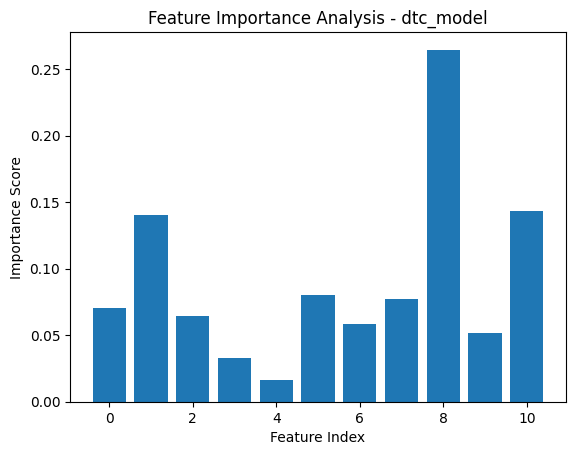

In [91]:
# feature importance

importance = dtc_model.feature_importances_

for i,v in enumerate (importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

# Barchat for feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title('Feature Importance Analysis - dtc_model')
pyplot.xlabel('Feature Index')
pyplot.ylabel('Importance Score')
pyplot.show()

features/columns: 0:'Gender', 1:'Married', 2:'Dependents', 2:'Education', 4:'Self_Employed', 5:'ApplicantIncome', 6:'CoapplicantIncome',7:'Loan_Amount_Term', 8:'Credit_History', 9:'Property_Area', 10:'LoanAmount_log'

In [92]:
prediction = dtc_model.predict(x_test) #prediction stores the predicted target/classes

Since we converted the categorical values earlier using a label encoder, let's convert them back

In [93]:
y_true = le.inverse_transform(y_test["Loan_Status"])
y_pred = le.inverse_transform(prediction)

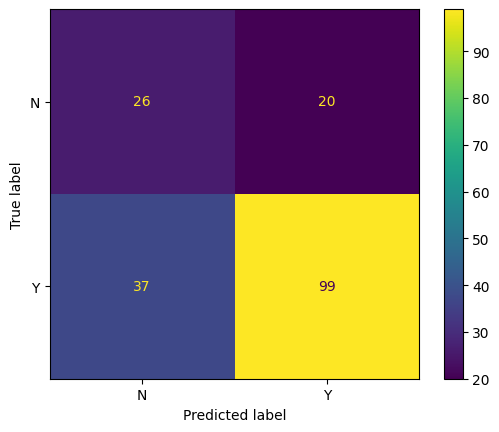

In [94]:
cm = confusion_matrix(y_true, y_pred)
labels = ['N', 'Y']
ConfusionMatrixDisplay(cm, display_labels=labels).plot()


In [95]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           N       0.41      0.57      0.48        46
           Y       0.83      0.73      0.78       136

    accuracy                           0.69       182
   macro avg       0.62      0.65      0.63       182
weighted avg       0.73      0.69      0.70       182



### Visualising the decision tree

We are visualising the decision tree in order to analyse it better. We are using Graphviz (https://graphviz.org/) to do that.

In [96]:
graphviz_path = 'C:/Program Files/Graphviz/bin/'

In [97]:
import os

os.environ["PATH"] += os.pathsep + graphviz_path

Install graphviz python library. Using the "pip install graphviz" in order to do that.

In [98]:
from graphviz import Source
from sklearn import tree
graph = Source( tree.export_graphviz(dtc_model, out_file=None, feature_names=features.columns))

You can display the graph with the following code.

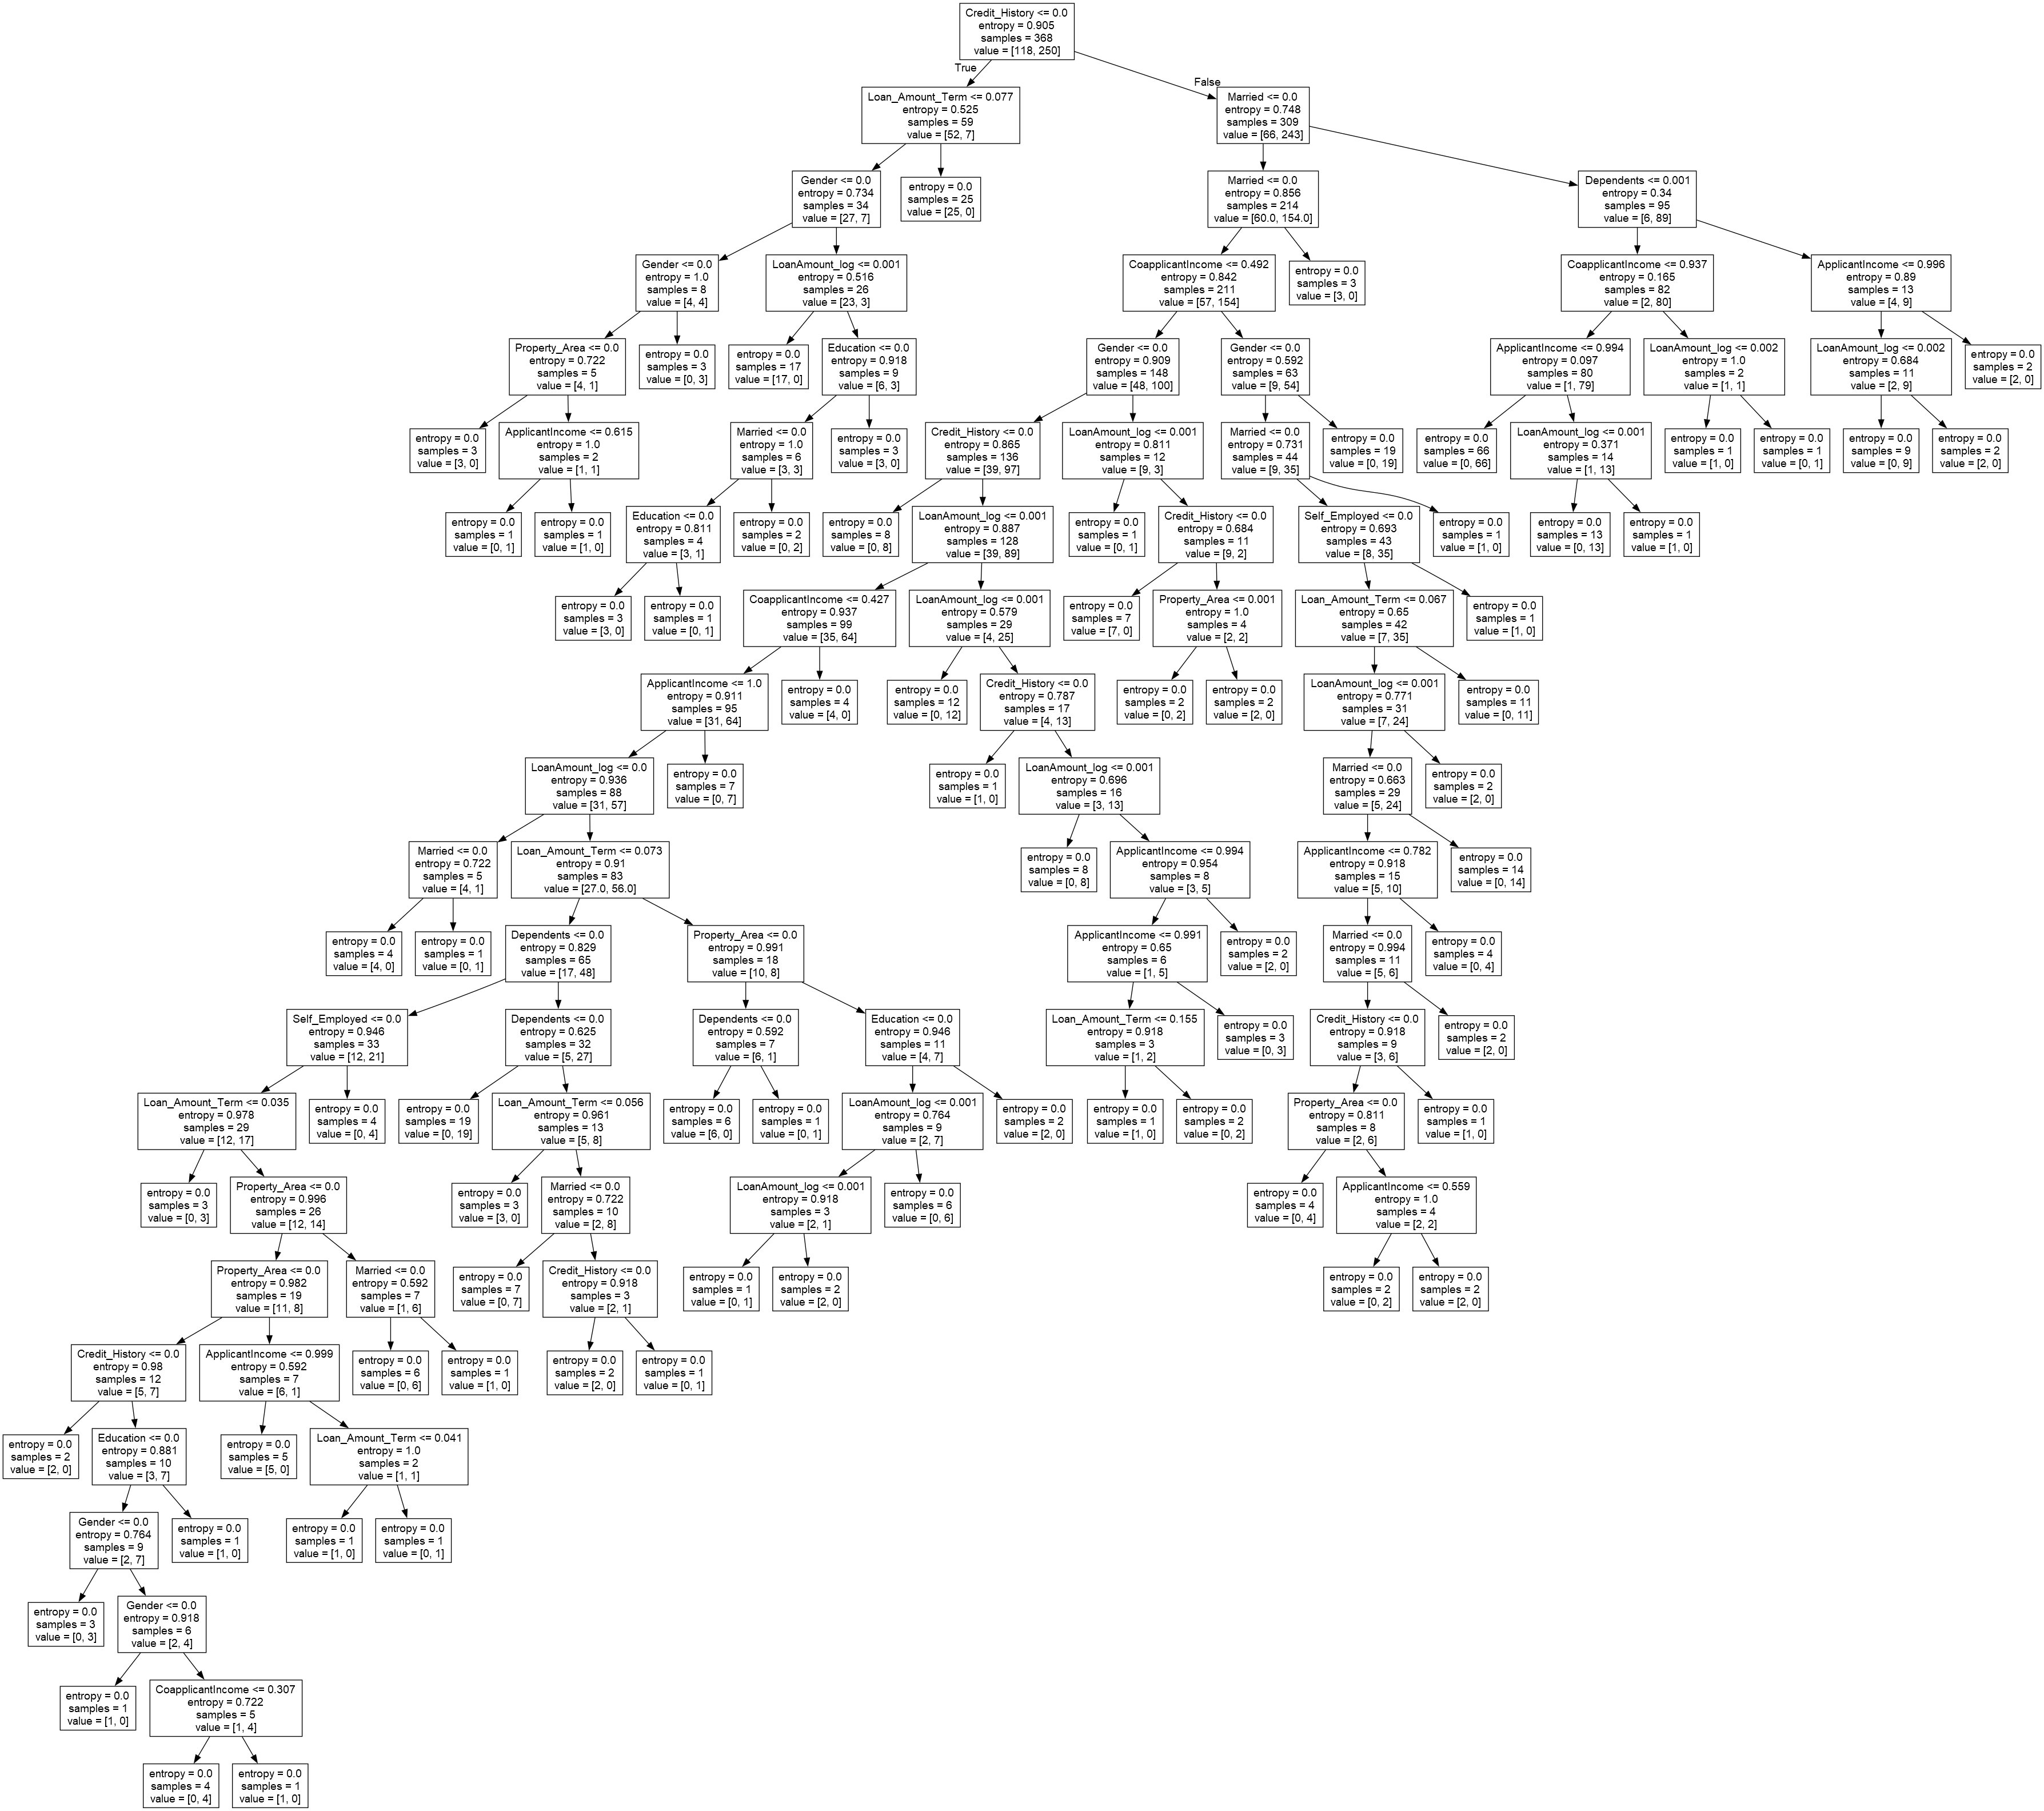

In [99]:
from cairosvg import svg2png
from IPython.display import Image

svg2png(bytestring=graph.pipe(format='svg'), write_to='output.png')
Image("output.png")

<h2>Reference</h2>

Analytics Vidhya. A Complete Python Tutorial to Learn Data Science from Scratch. Available online: here (https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/)

<h2>Report</h2>

Answer the following questions. Please provide code as as appropriate to answer the questions.

<h4 style="color:blue;">Q6. Based on the feature importance, select a different set of features to build another decision tree model. You should aim to improve the result of the baseline model.</h4>

**HINT:** Look at the feature importance section of the Notebook. 

> The definition of a different set of features to run the decision tree model can be a strategy to improve the model's performance metrics. In this experiment, the new list of features will exclude the 'Self_Employed' attribute.

> The code below shows the new features list and the creation of the new model with the updated list.

In [100]:
# Select different Features
features_2 = normalized_data.drop(['Loan_Status', 'Self_Employed' ], axis=1)

# Last four digits of the student number 6040. Get the training and testing sets
x2_train, x2_test, y2_train, y2_test = train_test_split(features_2, classes, test_size= 0.33, random_state= 6040)


In [101]:
# Create a decision tree clasifier

decisionTree_2 = DecisionTreeClassifier(criterion='entropy')


# Train the model with the new selection of features

dtc_model_2 = decisionTree_2.fit(x2_train, y2_train)

# Get the predictions of the model in the test dataset

prediction_2 = dtc_model_2.predict(x2_test) 

# Convert back the categorical values using label endcoder.

y_true_2 = le.inverse_transform(y2_test["Loan_Status"])
y_pred_2 = le.inverse_transform(prediction_2)

<h4 style="color:blue;">Q7. Write a summary (max 250 words) to compare both the models. The summary should include: idea behind selecting those particular features and comparative analysis of the results of both the models.</h4>


> The selection of the feature list is defined based on the feature importance analysis defined previously and presented in Figure 1. In this example, the 'Self_Employed' feature was excluded because it has an importance score of less than 2%. Initially, only one feature is excluded just to avoid losing generalization in the model. However, based on the performance variation, other changes can be implemented.

> The 'feature_importances_'  is a great tool to understand the most relevant features in the model (Wade and Glynn, 2020). It provides a guideline to tweak the algorithm's inputs to improve the models' performance metrics

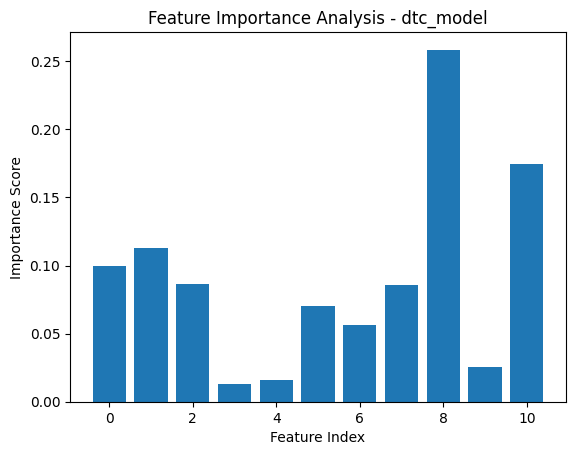

*Figure 1: Features|columns: 0:'Gender', 1:'Married', 2:'Dependents', 3:'Education', 4:'Self_Employed', 5:'ApplicantIncome', 6:'CoapplicantIncome',7:'Loan_Amount_Term', 8:'Credit_History', 9:'Property_Area', 10:'LoanAmount_log'*

> Both models can be compared using the confusion matrix to see how their results change from one to another

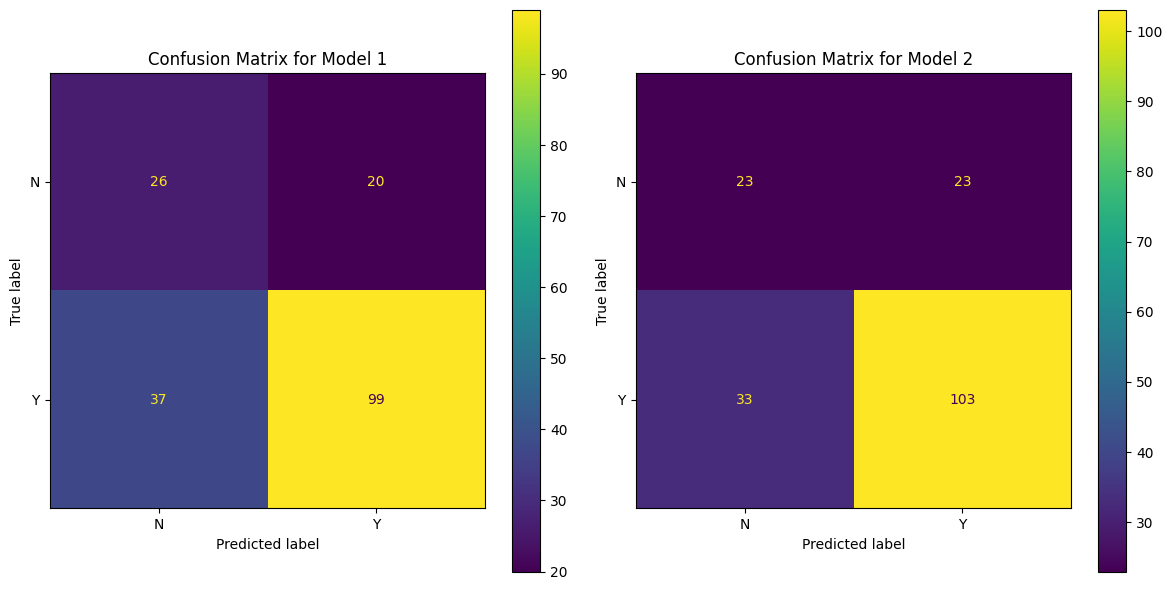

In [102]:
# Confusion matrix for Model 1
cm1 = confusion_matrix(y_true, y_pred)
labels = ['N', 'Y']
disp1 = ConfusionMatrixDisplay(cm, display_labels=labels)

# Confusion matrix for Model 2
cm = confusion_matrix(y_true_2, y_pred_2)
labels = ['N', 'Y']
disp2 = ConfusionMatrixDisplay(cm, display_labels=labels)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot Confusion Matrix for Model 1
disp1.plot(ax=axs[0])
axs[0].set_title('Confusion Matrix for Model 1')

# Plot Confusion Matrix for Model 2
disp2.plot(ax=axs[1])
axs[1].set_title('Confusion Matrix for Model 2')

plt.tight_layout()
plt.show()

> From the perspective of the confusion matrix, model 2 performed better when predicting a higher number of True Positives values of class 'Y' but in the same way it performed worst than model 1 when predicting the True Negatives of class 'N'. Overall, the results for both models turn out to be quite related, even visually the colors of from the gradient are analogous. 

> Nevertheless, more observations can be identified when running the evaluation matrix explained in the next point.

<h4 style="color:blue;">Q8. Discuss the result based on the evaluation matrix (max 250 words).</h4>


In [117]:
print('Classification Report Model 1 \n')
print(classification_report(y_true, y_pred))
print()
print('Classification Report Model 2 \n')
print(classification_report(y_true_2, y_pred_2))


Classification Report Model 1 

              precision    recall  f1-score   support

           N       0.41      0.57      0.48        46
           Y       0.83      0.73      0.78       136

    accuracy                           0.69       182
   macro avg       0.62      0.65      0.63       182
weighted avg       0.73      0.69      0.70       182


Classification Report Model 2 

              precision    recall  f1-score   support

           N       0.41      0.50      0.45        46
           Y       0.82      0.76      0.79       136

    accuracy                           0.69       182
   macro avg       0.61      0.63      0.62       182
weighted avg       0.71      0.69      0.70       182



> The evaluation matrices provide values to contrast the performance of both models. In this example, the main metric of comparison will be the f1-score. This indicator is a convenient way to compare models because it considers precision and recall (Geron, 2017). 

> Based on the f1-score, model 2 performs better in class 'Y' by 0.01 but it performs worse in class 'N' where the value in model 1 is better by 0.03. The approach of comparing the performance metrics between models allow the scientist to make changes in the model or inputs to find ways to create more robust models that perform better.



<h2> Bibliography </h2>

Géron, A. (2017) Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent System. 2nd edn.O'Reilly Media, Inc.

Wade, C. and Glynn, K. (2020) Hands-On Gradient Boosting with XGBoost and Scikit-learn. Packt Publishing.


